<a href="https://colab.research.google.com/github/cianadeveau/AllenBrainData_import/blob/main/Allen_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Allen Brain Data: 2-photon

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as st

In [ ]:
!pip install allensdk

## Read in Data

In [ ]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
drive_path = '/data/allen-brain-observatory/visual-coding-2p'
manifest_file = os.path.join(drive_path, 'manifest.json')

boc = BrainObservatoryCache(manifest_file=manifest_file)

In [ ]:
boc.get_all_targeted_structures()

['VISal', 'VISam', 'VISl', 'VISp', 'VISpm', 'VISrl']

In [ ]:
boc.get_all_cre_lines()

['Cux2-CreERT2',
 'Emx1-IRES-Cre',
 'Fezf2-CreER',
 'Nr5a1-Cre',
 'Ntsr1-Cre_GN220',
 'Pvalb-IRES-Cre',
 'Rbp4-Cre_KL100',
 'Rorb-IRES2-Cre',
 'Scnn1a-Tg3-Cre',
 'Slc17a7-IRES2-Cre',
 'Sst-IRES-Cre',
 'Tlx3-Cre_PL56',
 'Vip-IRES-Cre']

In [ ]:
boc.get_all_stimuli()

['drifting_gratings',
 'locally_sparse_noise',
 'locally_sparse_noise_4deg',
 'locally_sparse_noise_8deg',
 'natural_movie_one',
 'natural_movie_three',
 'natural_movie_two',
 'natural_scenes',
 'spontaneous',
 'static_gratings']

In [ ]:
visual_area = 'VISp'
cre_line = 'Cux2-CreERT2'

In [ ]:
exps = boc.get_experiment_containers(targeted_structures=[visual_area], cre_lines=[cre_line])

In [ ]:
pd.DataFrame(exps)

,id,imaging_depth,targeted_structure,cre_line,reporter_line,donor_name,specimen_name,tags,failed
0,511510736,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),222426,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,[],False
1,511510855,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),229106,Cux2-CreERT2;Camk2a-tTA;Ai93-229106,[],False
2,511509529,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),222420,Cux2-CreERT2;Camk2a-tTA;Ai93-222420,[],False
3,511507650,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),222424,Cux2-CreERT2;Camk2a-tTA;Ai93-222424,[],False
4,702934962,275,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),382421,Cux2-CreERT2;Camk2a-tTA;Ai93-382421,[],False
5,645413757,275,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),348262,Cux2-CreERT2;Camk2a-tTA;Ai93-348262,[],False
6,659767480,275,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),360565,Cux2-CreERT2;Camk2a-tTA;Ai93-360565,[],False
7,511510650,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),222425,Cux2-CreERT2;Camk2a-tTA;Ai93-222425,[],False
8,712178509,275,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),390323,Cux2-CreERT2;Camk2a-tTA;Ai93-390323,[],False
9,511510667,275,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),222420,Cux2-CreERT2;Camk2a-tTA;Ai93-222420,[],False


## Select Experiment

In [ ]:
experiment_container_id = 511510855
sessions = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id])

In [ ]:
pd.DataFrame(sessions)

,id,imaging_depth,targeted_structure,cre_line,reporter_line,acquisition_age_days,experiment_container_id,session_type,donor_name,specimen_name,fail_eye_tracking
0,510705057,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),105,511510855,three_session_B,229106,Cux2-CreERT2;Camk2a-tTA;Ai93-229106,False
1,510517131,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),103,511510855,three_session_A,229106,Cux2-CreERT2;Camk2a-tTA;Ai93-229106,False
2,509644421,175,VISp,Cux2-CreERT2,Ai93(TITL-GCaMP6f),99,511510855,three_session_C,229106,Cux2-CreERT2;Camk2a-tTA;Ai93-229106,False


In [ ]:
# natural movie experiment
session_id = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id], stimuli=['natural_movie_one'])[0]['id']
# or grating
#session_id = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id], stimuli=['drifting_gratings'])[0]['id']

In [ ]:
dataset = boc.get_ophys_experiment_data(session_id)
ts, dff = dataset.get_dff_traces()

2025-01-16 19:28:05,248 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/516803202
INFO:allensdk.api.api.retrieve_file_over_http:Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/516803202


## Visualize and Select Data

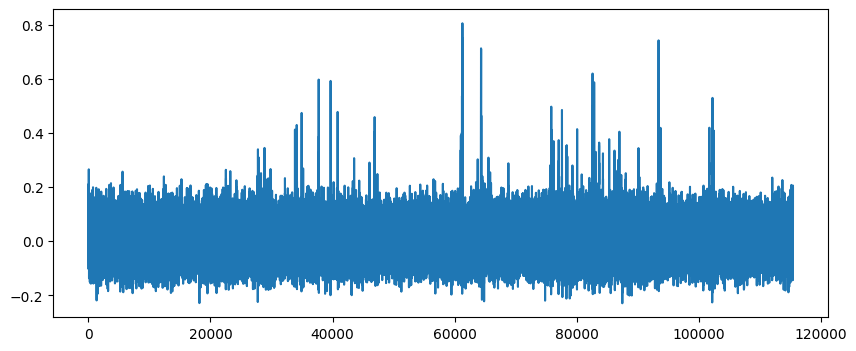

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(dff[0,:])

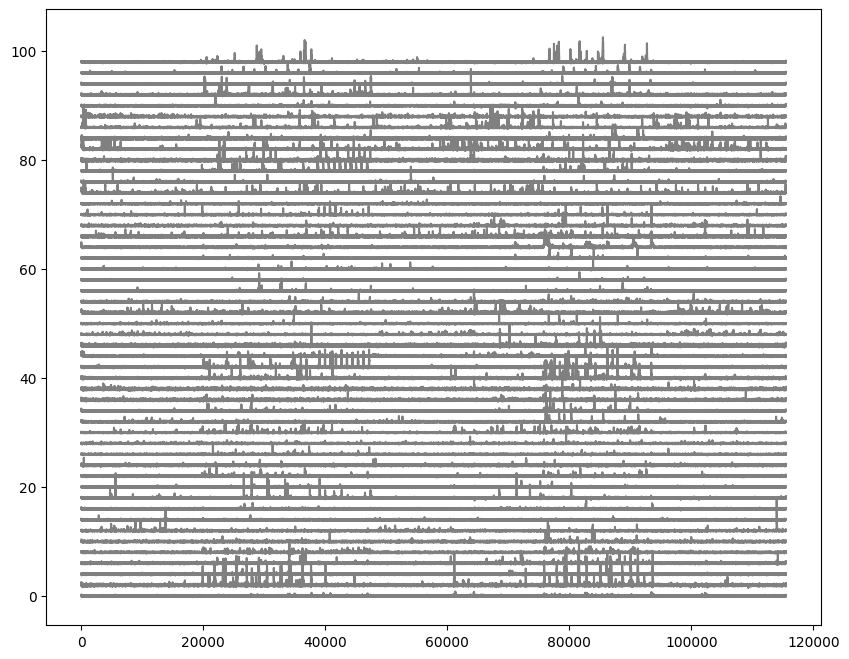

In [ ]:
fig = plt.figure(figsize=(10,8))
for i in range(50):
  plt.plot(dff[i, :]+(i*2), color='gray') # the i*2 adjusts the location of the trace in the plot

In [ ]:
stim_epoch = dataset.get_stimulus_epoch_table()

In [ ]:
stim_epoch

,stimulus,start,end
0,drifting_gratings,747,18777
1,natural_movie_three,19711,37771
2,natural_movie_one,38674,47705
3,drifting_gratings,48608,66638
4,spontaneous,66788,75697
5,natural_movie_three,75698,93757
6,drifting_gratings,94661,115220


In [ ]:
stim_epoch[stim_epoch['stimulus']=='drifting_gratings']

,stimulus,start,end
0,drifting_gratings,747,18777
3,drifting_gratings,48608,66638
6,drifting_gratings,94661,115220


In [ ]:
gratings_dff = []
for start, end in zip(stim_epoch[stim_epoch['stimulus']=='drifting_gratings']['start'], stim_epoch[stim_epoch['stimulus']=='drifting_gratings']['end']):
  gratings_dff.append(dff[:,start:end])

In [ ]:
stim_epoch[stim_epoch['stimulus']=='natural_movie_one']

,stimulus,start,end
5,natural_movie_one,70307,79338


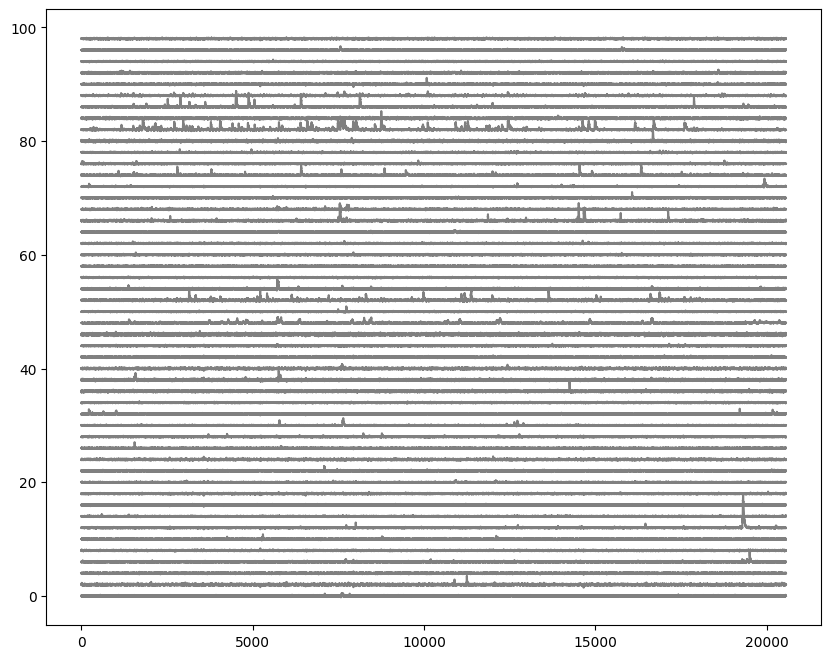

In [ ]:
fig = plt.figure(figsize=(10,8))
for i in range(50):
  plt.plot(dff[i, 94661:115220]+(i*2), color='gray')

In [ ]:
natural_movie_dff = []
for start, end in zip(stim_epoch[stim_epoch['stimulus']=='natural_moive_one']['start'], stim_epoch[stim_epoch['stimulus']=='natural_movie_one']['end']):
  natural_movie_dff.append(dff[:,start:end])

## Save Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.insert(0,'/content/drive/My Drive/src')
from pathlib import Path
datadir = Path('/content/drive/My Drive/Colab Notebooks/BMM/').expanduser()

In [ ]:
np.save(datadir/'drifting_gratings_dff.npy', np.concatenate(gratings_dff, axis=1))